In [98]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn.preprocessing as preprocessing

import sklearn.linear_model as lm


from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings("ignore")


Introduction

This work is based on the analysis of a dataset concerning the performance of some Portuguese students of secondary school and some personal information related to them. It was used to see if it could be traced back to which were the things that most influenced the school performance of a Portuguese boy in the two main subjects Mathematics and Portuguese language. The two datasets (one for each subject) contain the same attributes that are shown below:

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [99]:
os.getcwd()

'C:\\Users\\luisp\\OneDrive\\Ambiente de Trabalho\\Trabalho'

In [100]:
mat = pd.read_csv('Datasets\student-mat.csv', sep = ';')
port = pd.read_csv('Datasets\student-por.csv', sep = ';')

In [101]:
print("The dataset about Mathematics has %d rows and %d columns " 
      % mat.shape + "and has " + ("some" if mat.isnull().values.any() else "no")  + " missing values.")


The dataset about Mathematics has 395 rows and 33 columns and has some missing values.


In [102]:
print("The dataset about Mathematics has %d rows and %d columns " 
      % port.shape + "and has " + ("some" if port.isnull().values.any() else "no")  + " missing values.")

The dataset about Mathematics has 649 rows and 33 columns and has some missing values.


In [103]:
def checkMissingValues(dataset):
    features = dataset.columns
    for feature in features:
        if (dataset[feature].isnull().values.any() == True):
            print("-The column '{}', has'{}' missing values.\n"
            .format(feature, dataset[feature].isnull().sum()))
            plt.bar(str(feature),int(dataset[feature].isnull().sum()))
    plt.title("Missing Values of Maths Dataset")
    plt.xlabel("Features name")
    plt.ylabel("Number of Missing Values")
    plt.show()

-The column 'Mjob', has'1' missing values.

-The column 'guardian', has'1' missing values.

-The column 'paid', has'1' missing values.

-The column 'goout', has'1' missing values.

-The column 'G1', has'1' missing values.

-The column 'G3', has'1' missing values.



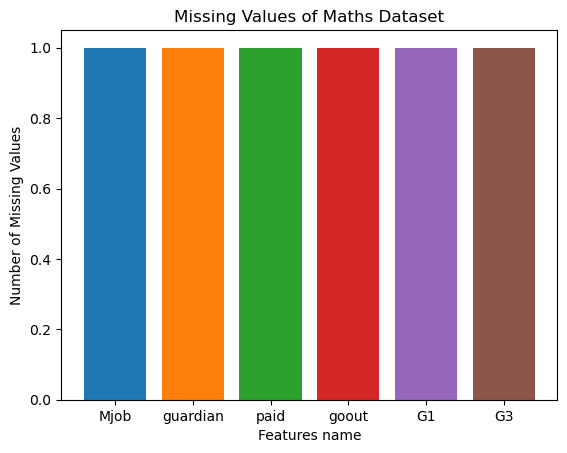

In [104]:
checkMissingValues(mat)

-The column 'address', has'1' missing values.



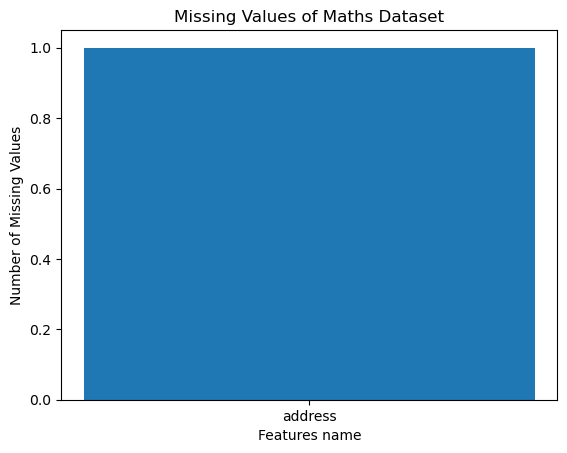

In [105]:
checkMissingValues(port)

In [106]:
male_students=len(mat[mat['sex']=='M'])
female_students=len(mat[mat['sex']=='F'])
print('No. of male students',male_students)
print('No. of female students',female_students)

No. of male students 187
No. of female students 208


In [107]:
male_students=len(port[port['sex']=='M'])
female_students=len(port[port['sex']=='F'])
print('No. of male students',male_students)
print('No. of female students',female_students)

No. of male students 266
No. of female students 383


In [108]:
print(port['school'])

0      GP
1      GP
2      GP
3      GP
4      GP
       ..
644    MS
645    MS
646    MS
647    MS
648    MS
Name: school, Length: 649, dtype: object


In [109]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        394 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    394 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        394 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [110]:
port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     648 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [111]:
features = mat.columns
numeric_features = mat._get_numeric_data().columns
for column in mat[numeric_features][:-2]:
    print("-The column '{}', has values that goes from '{}' to '{}' and is '{}' type.\n"
    .format(column, mat[column].min(), mat[column].max(), mat[column].dtype))
list_cathegorical_features = list(set(features) - set(numeric_features))
for column in mat[list_cathegorical_features][:-2]:
    print("-The column '{}' is a categorical column ".format(column))

-The column 'age', has values that goes from '15' to '22' and is 'int64' type.

-The column 'Medu', has values that goes from '0' to '4' and is 'int64' type.

-The column 'Fedu', has values that goes from '0' to '4' and is 'int64' type.

-The column 'traveltime', has values that goes from '1' to '4' and is 'int64' type.

-The column 'studytime', has values that goes from '1' to '4' and is 'int64' type.

-The column 'failures', has values that goes from '0' to '3' and is 'int64' type.

-The column 'famrel', has values that goes from '1' to '5' and is 'int64' type.

-The column 'freetime', has values that goes from '1' to '5' and is 'int64' type.

-The column 'goout', has values that goes from '1.0' to '5.0' and is 'float64' type.

-The column 'Dalc', has values that goes from '1' to '5' and is 'int64' type.

-The column 'Walc', has values that goes from '1' to '5' and is 'int64' type.

-The column 'health', has values that goes from '1' to '5' and is 'int64' type.

-The column 'absences

In [112]:
print(mat.G3.unique())

[ 6. 10. 15. 11. 19.  9. 12. 14. 16.  5. 21.  8. 17. 18. 13. 20.  7.  0.
  2.  4. nan]


In [113]:
print(mat['Mjob'].value_counts())
print(mat['Mjob'].unique())

other       141
services    102
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
['at_home' 'health' 'other' 'services' 'teacher' nan]


In [114]:
def checkValueCounts(dataset):
    features = dataset.columns
    for feature in features:
        print("-The column '{}', has': \n{}'"
        .format(feature, dataset[feature].value_counts()))

checkValueCounts(mat)

-The column 'school', has': 
GP    349
MS     46
Name: school, dtype: int64'
-The column 'sex', has': 
F    208
M    187
Name: sex, dtype: int64'
-The column 'age', has': 
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64'
-The column 'address', has': 
U    307
R     88
Name: address, dtype: int64'
-The column 'famsize', has': 
GT3    281
LE3    114
Name: famsize, dtype: int64'
-The column 'Pstatus', has': 
T    354
A     41
Name: Pstatus, dtype: int64'
-The column 'Medu', has': 
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64'
-The column 'Fedu', has': 
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64'
-The column 'Mjob', has': 
other       141
services    102
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64'
-The column 'Fjob', has': 
other       217
services    110
teacher      29
at_home      21
health       18
Name: Fjob, dtype: int64'
-The column 'reason', has'

In [115]:
def checkUniqueValues(dataset):
    features = dataset.columns
    for feature in features:
        print("-The column '{}', has'{}' values.\n"
        .format(feature, dataset[feature].unique()))

checkUniqueValues(mat)

-The column 'school', has'['GP' 'MS']' values.

-The column 'sex', has'['F' 'M']' values.

-The column 'age', has'[18 17 15 16 19 22 20 21]' values.

-The column 'address', has'['U' 'R']' values.

-The column 'famsize', has'['GT3' 'LE3']' values.

-The column 'Pstatus', has'['A' 'T']' values.

-The column 'Medu', has'[4 1 3 2 0]' values.

-The column 'Fedu', has'[4 1 2 3 0]' values.

-The column 'Mjob', has'['at_home' 'health' 'other' 'services' 'teacher' nan]' values.

-The column 'Fjob', has'['teacher' 'other' 'services' 'health' 'at_home']' values.

-The column 'reason', has'['course' 'other' 'home' 'reputation']' values.

-The column 'guardian', has'['mother' 'father' 'other' nan]' values.

-The column 'traveltime', has'[2 1 3 4]' values.

-The column 'studytime', has'[2 3 1 4]' values.

-The column 'failures', has'[0 3 2 1]' values.

-The column 'schoolsup', has'['yes' 'no']' values.

-The column 'famsup', has'['no' 'yes']' values.

-The column 'paid', has'['no' 'yes' nan]' values

In [116]:
checkUniqueValues(port)

-The column 'school', has'['GP' 'MS']' values.

-The column 'sex', has'['F' 'M']' values.

-The column 'age', has'[18 17 15 16 19 22 20 21]' values.

-The column 'address', has'['U' 'R' nan]' values.

-The column 'famsize', has'['GT3' 'LE3']' values.

-The column 'Pstatus', has'['A' 'T']' values.

-The column 'Medu', has'[4 1 3 2 0]' values.

-The column 'Fedu', has'[4 1 2 3 0]' values.

-The column 'Mjob', has'['at_home' 'health' 'other' 'services' 'teacher']' values.

-The column 'Fjob', has'['teacher' 'other' 'services' 'health' 'at_home']' values.

-The column 'reason', has'['course' 'other' 'home' 'reputation']' values.

-The column 'guardian', has'['mother' 'father' 'other']' values.

-The column 'traveltime', has'[2 1 3 4]' values.

-The column 'studytime', has'[2 3 1 4]' values.

-The column 'failures', has'[0 3 1 2]' values.

-The column 'schoolsup', has'['yes' 'no']' values.

-The column 'famsup', has'['no' 'yes']' values.

-The column 'paid', has'['no' 'yes']' values.

-The 

In [117]:
def getBarPlots(dataset):
    plt.figure(figsize = (30, 30))
    for i in enumerate(dataset.columns):
        plt.subplot(int(dataset.columns.size/4)+1,4,i[0]+1)
        sns.countplot(i[1], data = dataset)

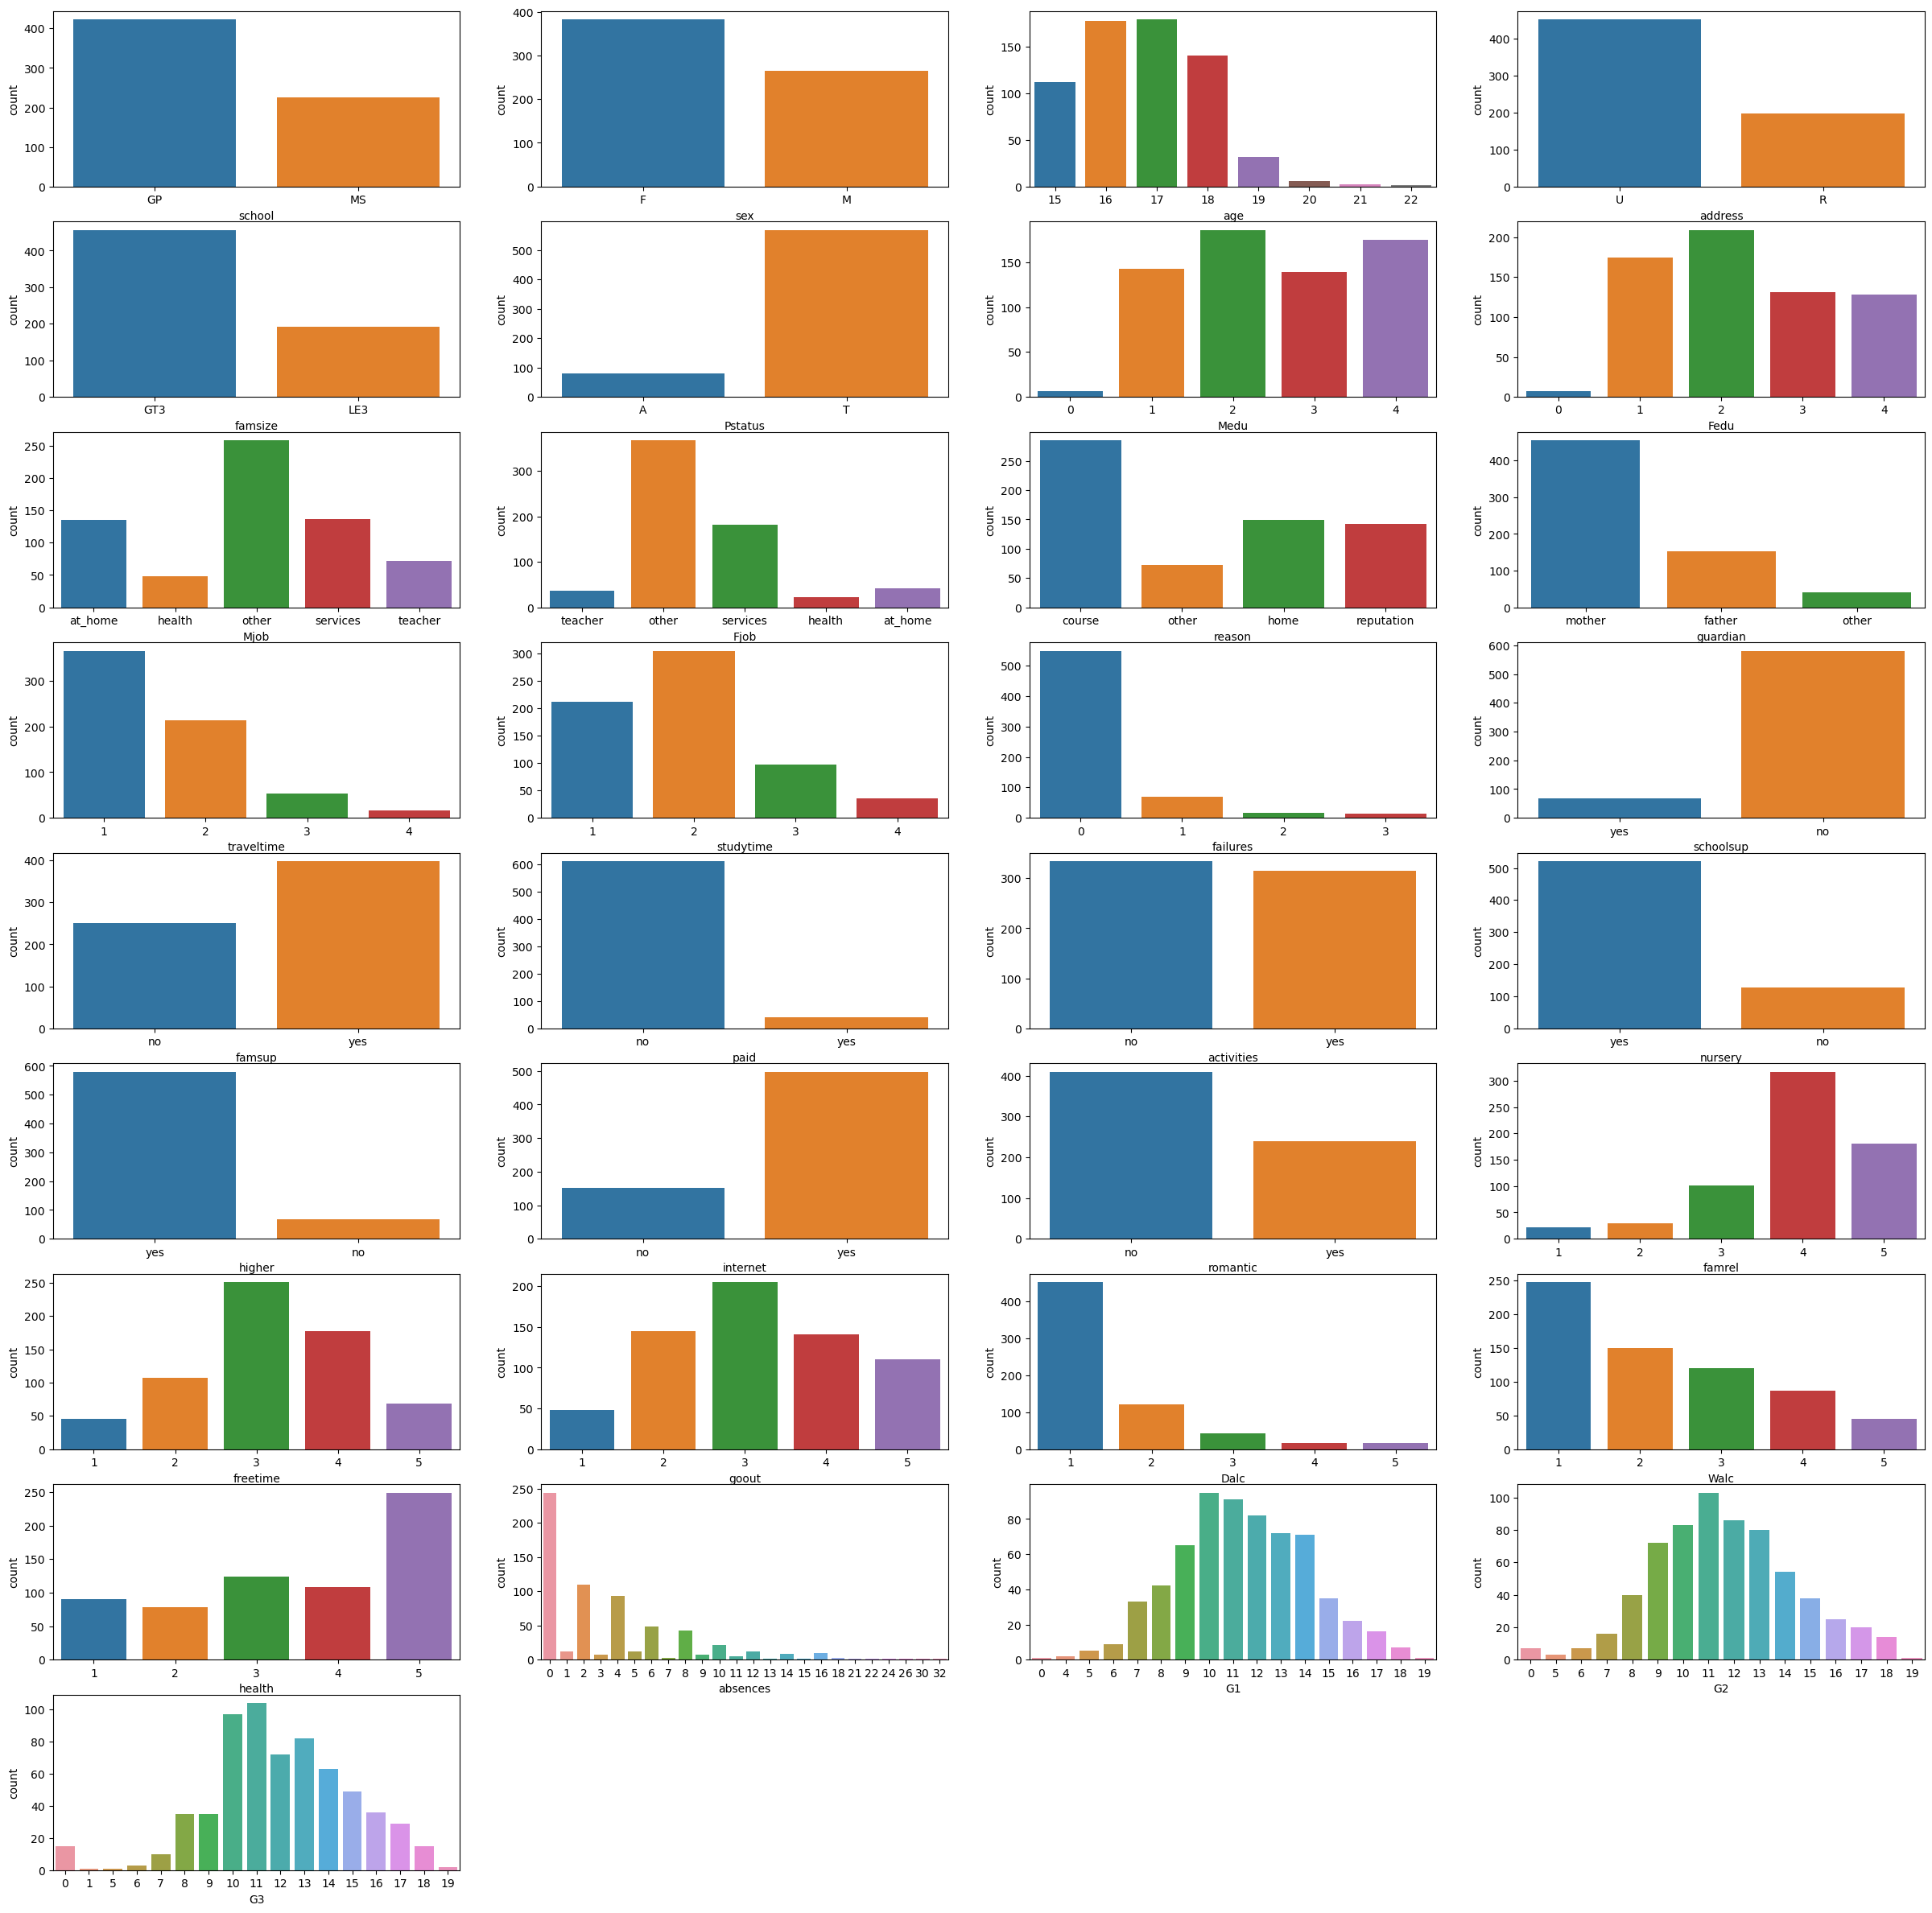

In [118]:
getBarPlots(port)

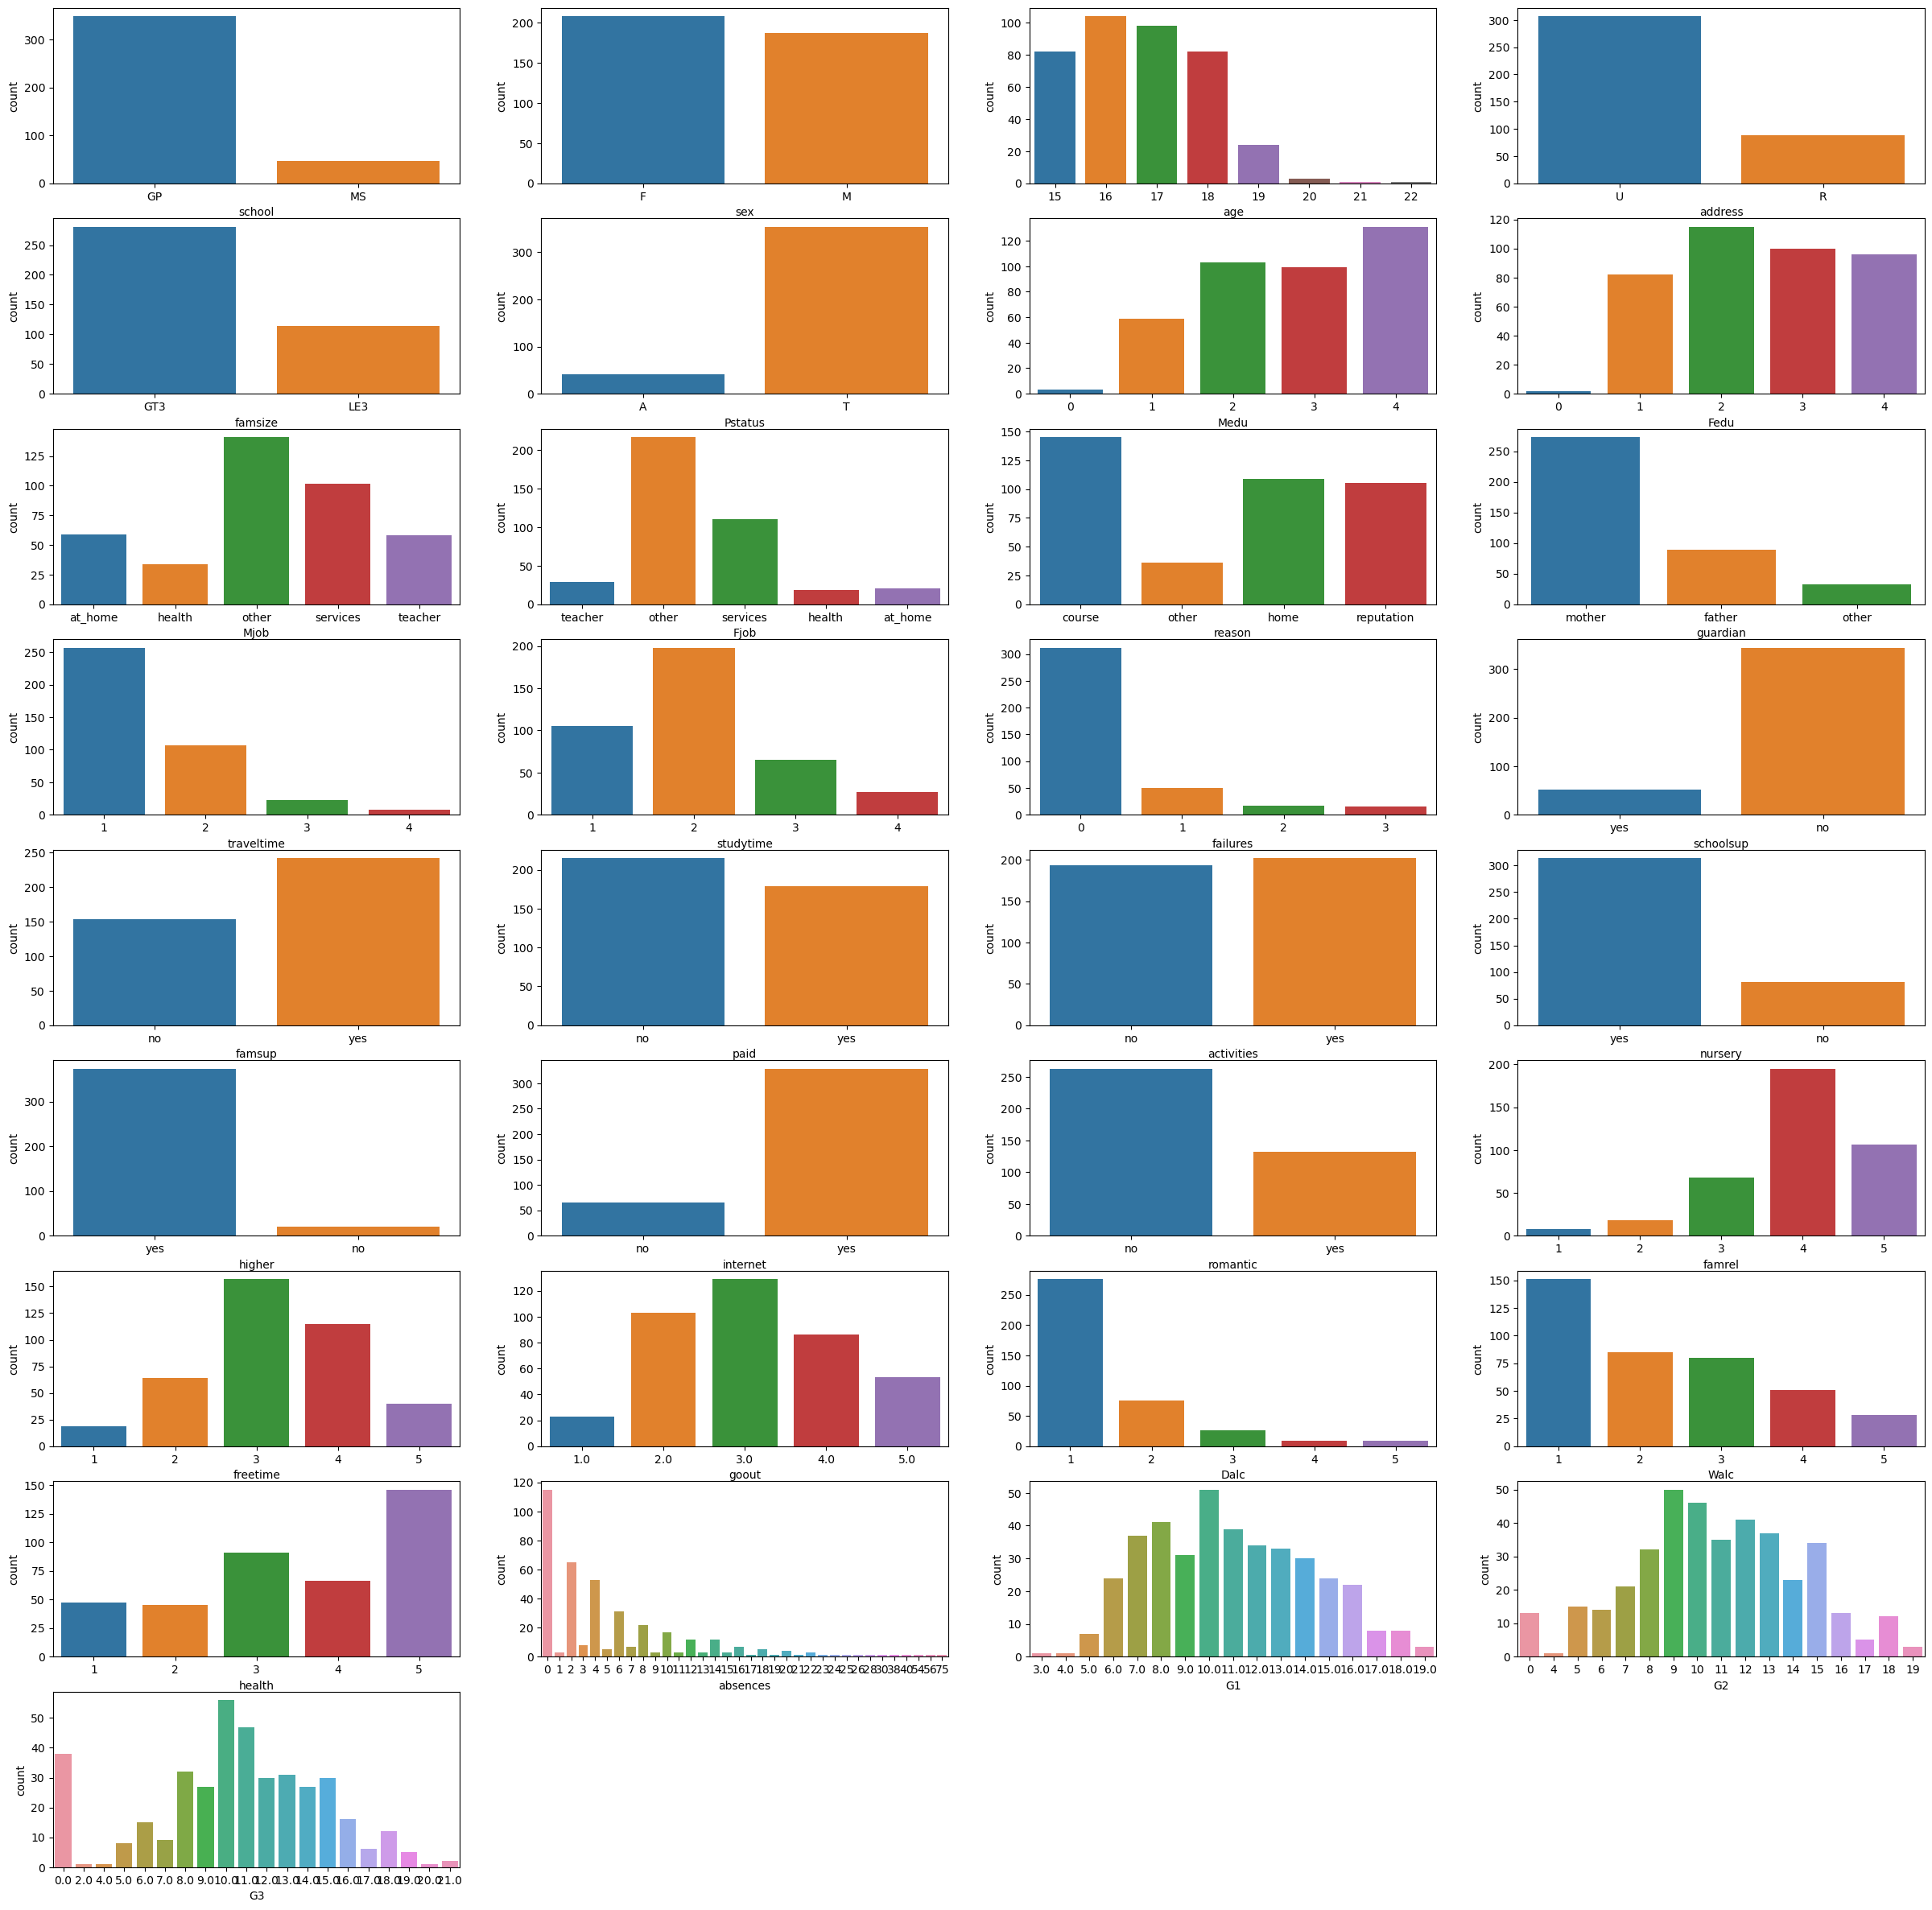

In [119]:
getBarPlots(mat)

In [120]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        394 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    394 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        394 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [121]:
port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     648 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

<AxesSubplot:xlabel='absences'>

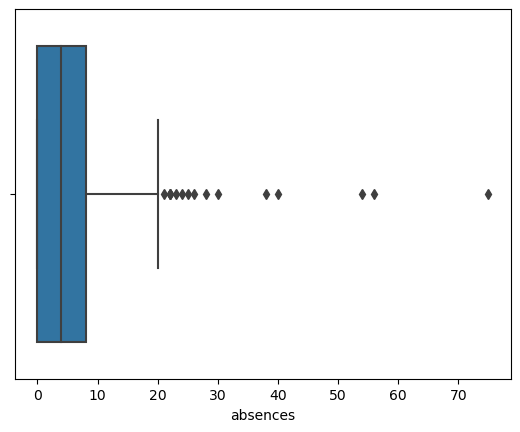

In [130]:
sns.boxplot(mat['absences'])

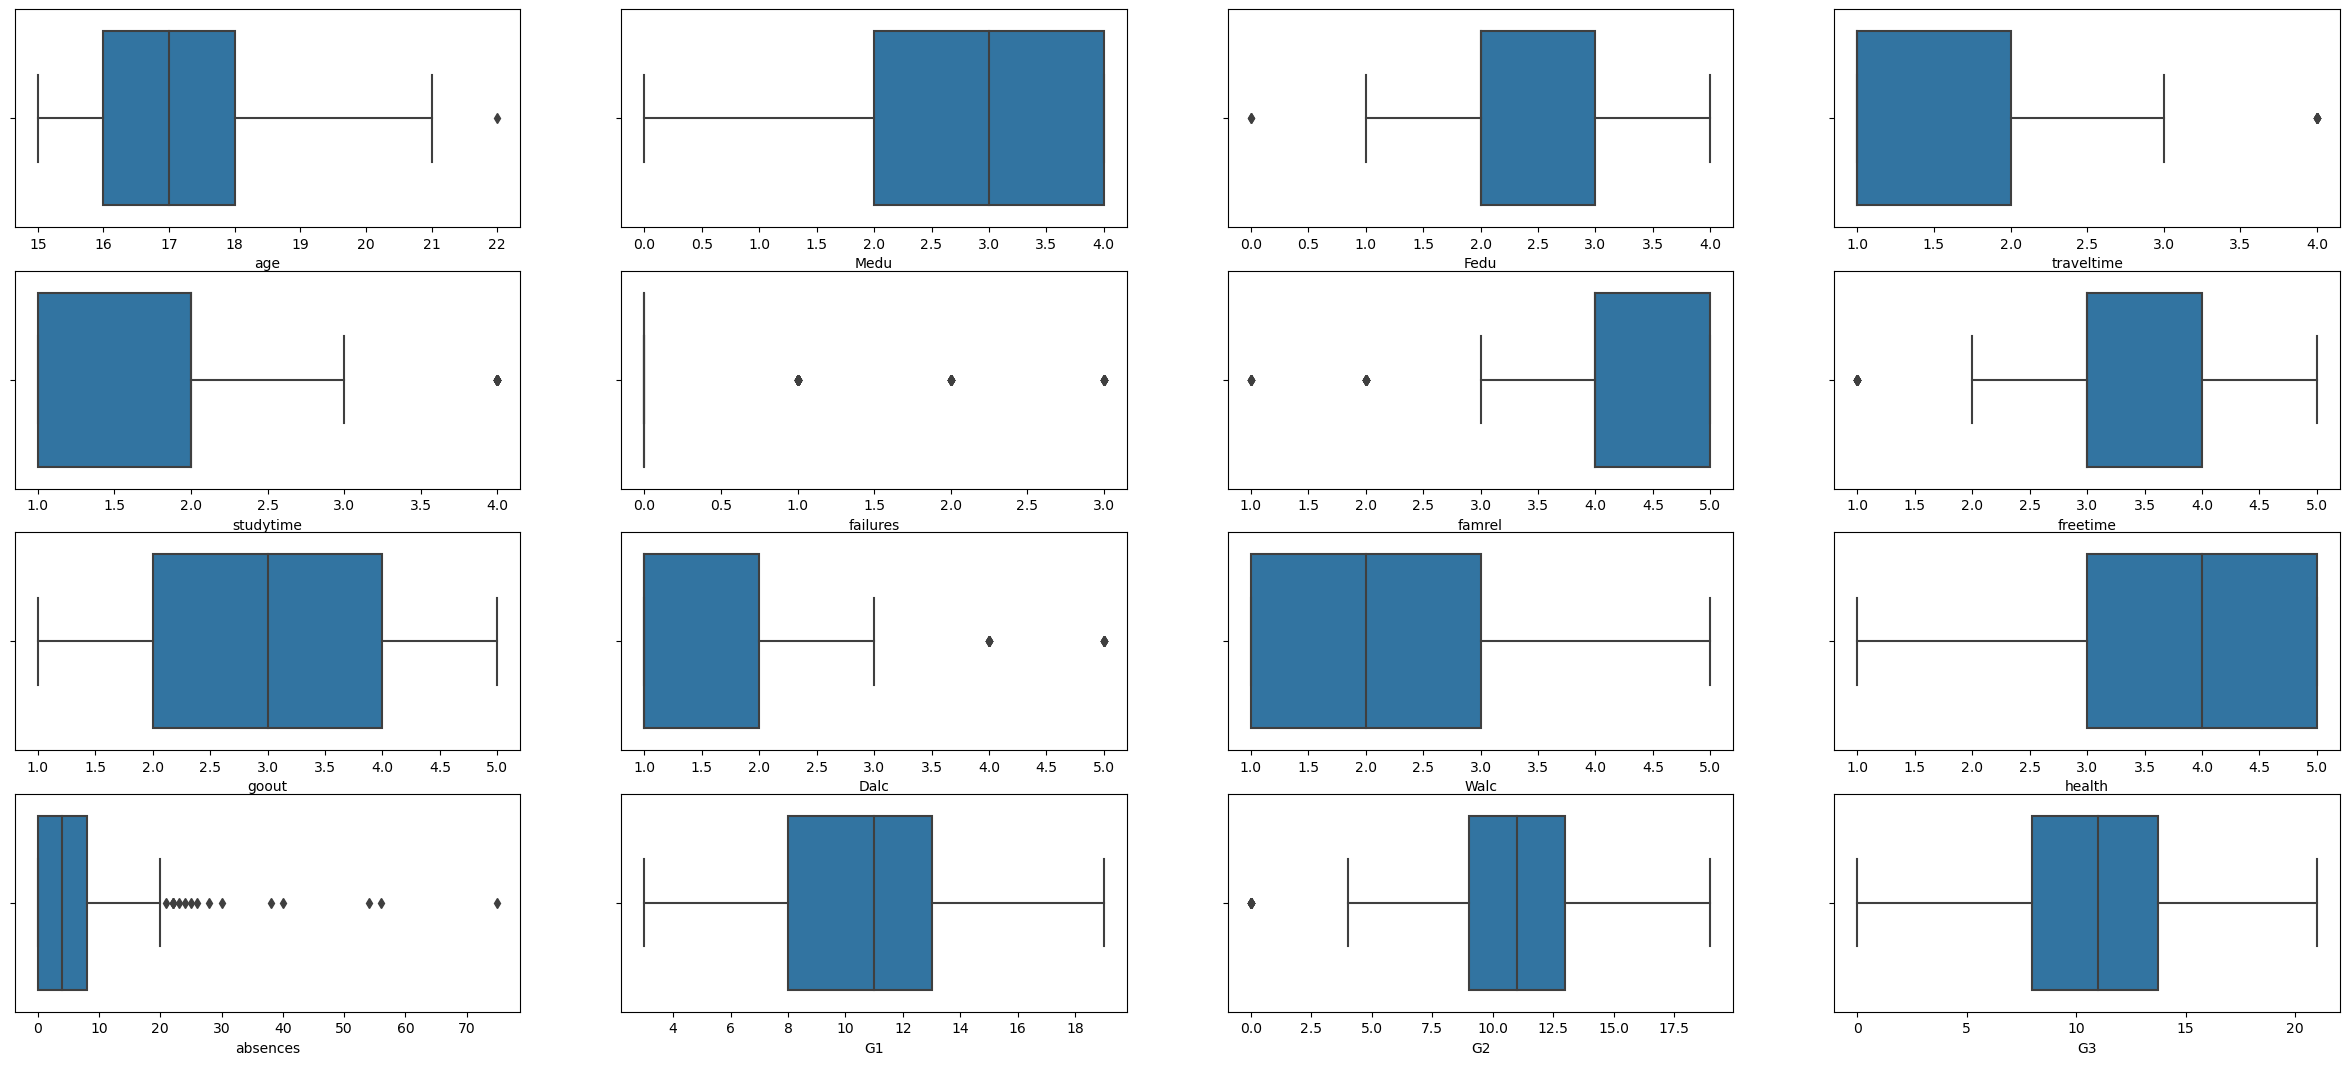

In [157]:
def getBoxplotPlots(dataset):
    plt.figure(figsize = (30, 30))
    for i in enumerate(dataset._get_numeric_data().columns):
        plt.subplot(int(dataset.columns.size/4)+1,4,i[0]+1)
        sns.boxplot(dataset[i[1]])
getBoxplotPlots(mat)

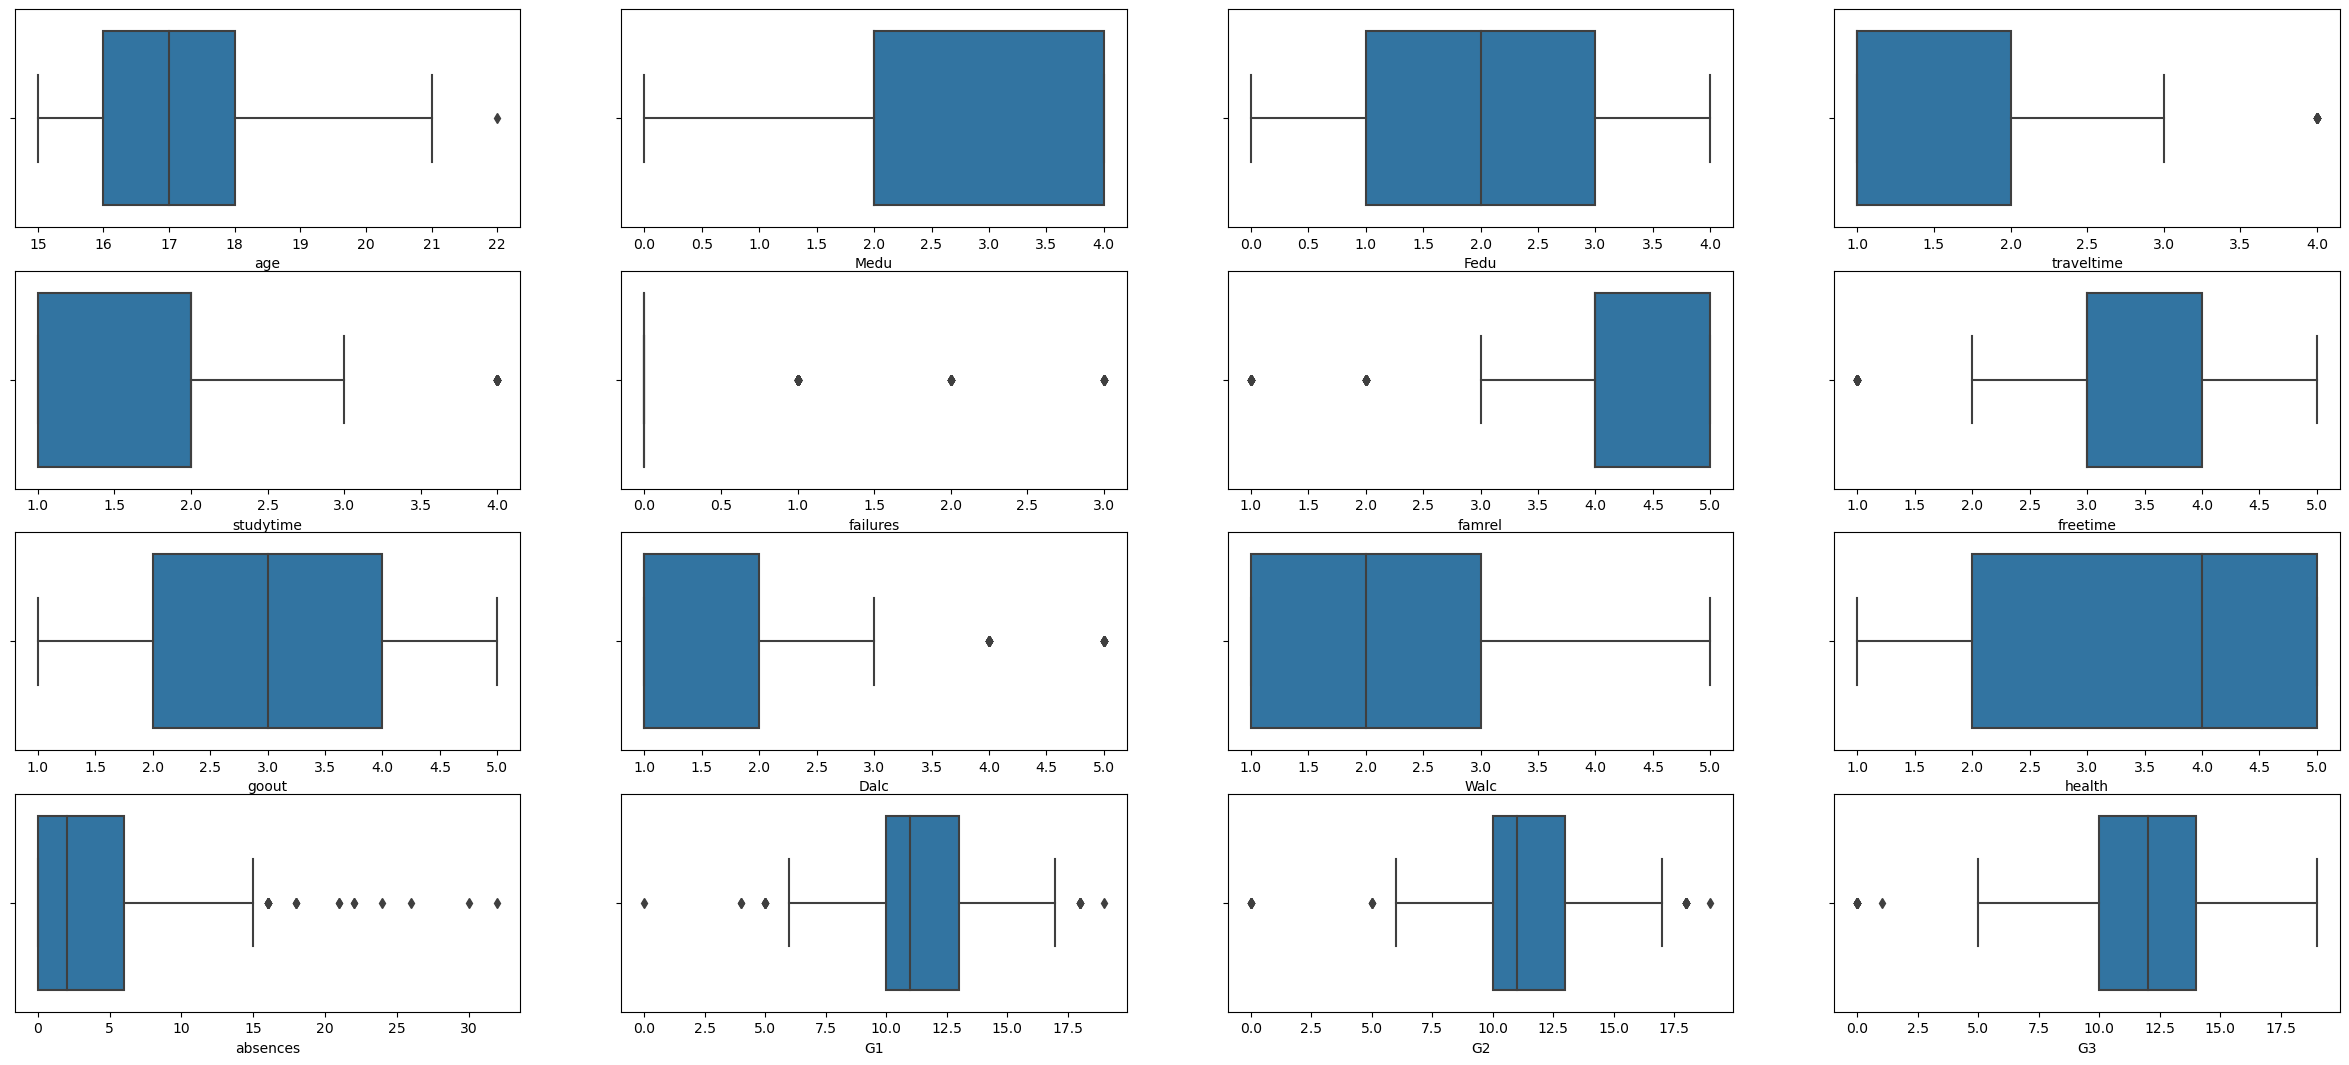

In [156]:
getBoxplotPlots(port)